# Newton's Method

Given $x_0$, $f(x)$, and $f'(x)$:

1. Calculate $f(x_0)$, and $f'(x_0)$
2. Calculate a new guess for the root:
$x_{1}\  =\  x_{0}\  -\  \frac{f(x_{0})}{f^{\prime }(x_{0})} $
3. Check for convergence ($f(x_1) \leq tol$)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from IPython.core.display import HTML
def css_style(url):
    style = requests.get(url)
    return HTML(style.text)
css_style('https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css')

In [5]:
def newton(f, df, x0, tol, maxiter):
    err = tol + 100
    niter = 0
    while err > tol and niter < maxiter:
        x1 = x0 - f(x0)/df(f,x0)
        x0 = x1
        err = abs(f(x0))
        niter += 1
    return x1, err, niter

In [94]:
def f(x):
    return np.sin(x)

def df(f,x):
    h = x*1e-6 + 1e-12
    return (f(x+h)-f(x-h))/(2*h)

def ddf(f, x):
    return (f(x+h) - 2*f(x) + f(x-h))/h**2

In [109]:
def r(c, u=40, m=70, t=10):
    g = 9.81
    return m*g/c * (1-np.exp(-c*t/m)) - u

def vel(t, c=15.214, m=70):
    g = 9.81
    return m*g/c * (1-np.exp(-c*t/m))

In [110]:
newton(f, df, 0.5, 1e-6, 100)

(-1.3326694619803653e-14, 1.3326694619803653e-14, 3)

In [126]:
x = np.linspace(.1, 10, 100)

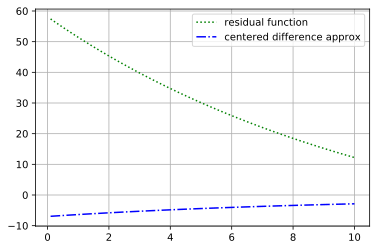

In [127]:
%config InlineBackend.figure_format = 'svg'
plt.plot(x, r(x), 'g:', label='residual function')
plt.plot(x, df(r, x), 'b-.', label='centered difference approx')
plt.legend()
plt.grid(True)

In [128]:
c_, err, niter = newton(r, df, 0.5, 1e-6, 40)

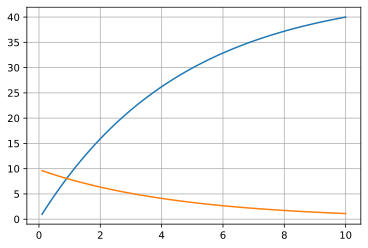

In [130]:
plt.plot(x, vel(x,c=c_), label='velocity profile')
plt.plot(x, df(vel, x))
plt.grid(True)

In [125]:
c_

15.214089808916311

Newton's Method can also be used to compute things such as the square root. The square root of a number $x$ is that number which satisfies the equation:

$$y*y = x$$

In most cases, we actually know what $x$ is, and are looking to find the $y$ term that satisfies the equation. In this case, it's more intuitive to think of the equation to be solved as 

$$x*x = A$$

where $A$ is known, and we are looking for x. This makes the residual equation:

$$r(x) = x*x - A$$

In [163]:
def square_root(x, A=17):
    return x*x - A

In [164]:
def df_sqrt(f, x, A=17):
    h = 1e-6
    return (f(x+h, A) - f(x, A))/h

In [166]:
sol, err, niters = newton(square_root, df_sqrt, 4, 1e-5, 10)
print(sol, err, niters)

4.123106060828827 3.5888434091191357e-06 2


Here, we've specified that we want to find the square root of 17, with a fairly close initial guess. The algorithm found the solution with a high degree of accuracy in very few iterations.

In [167]:
x = np.linspace(1, 10)

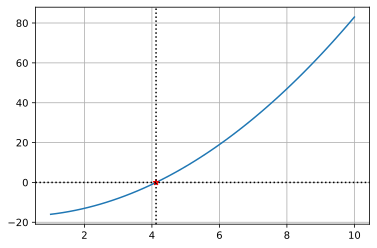

In [168]:
plt.plot(x, square_root(x))
plt.plot(sol, square_root(sol), 'r*')
plt.axvline(sol, c='k',ls=':')
plt.axhline(square_root(sol), c='k', ls=':')
plt.grid(True)